In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In week 3, you:
- Explored the dataset
- Built a full data pipeline
- Pre-processed data, explored features

Building on your work of week 3:
- Split dataset into 3 sets:
  - 70% -> Training and cross validation
  - 15% -> Model Stacking
  - 15% -> Testing
  

- Tune a decision tree classfier:
  - select a score (http://scikit-learn.org/stable/modules/model_evaluation.html). Explain your choice 
  - tune one parameter a time. Generate a plot for the score vs parameter values. Analyze your results.
    - criterion, max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes=None    
  - tune all parameters at the same time using a randomgrid(http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). First, run with a coarse grid, then refine in the next iteration. Use the information from the previous step to select parameter values.
  

In [2]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", 
                   sheet = 0, skiprows= 1, header = 0)

In [3]:
pd.set_option('display.max_columns', None)
df = df.rename(columns = {'PAY_0':'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.3)

In [5]:
credit = train_set.drop("default payment next month", axis = 1)

credit_labels = train_set["default payment next month"].copy()

In [6]:
from CategoricalEncoder import CategoricalEncoder
from DataFrameSelector import DataFrameSelector

In [7]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["LIMIT_BAL", "AGE", "PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
                                              "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
                                              "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"])),
        ])

In [8]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["SEX", "EDUCATION", "MARRIAGE"])),
        ("cat_encoder", CategoricalEncoder(encoding='onehot-dense')),
    ])

In [9]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [10]:
credit_prepared = preprocess_pipeline.fit_transform(credit)

#Tune a decision tree classfier:
select a score (http://scikit-learn.org/stable/modules/model_evaluation.html). Explain your choice 
tune one parameter a time. Generate a plot for the score vs parameter values. Analyze your results.
criterion, max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes=None 
tune all parameters at the same time using a randomgrid(http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). First, run with a coarse grid, then refine in the next iteration. Use the information from the previous step to select parameter values.
In [2]:


### Your code here

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'min_samples_split': [4, 5, 10]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1,cv=5,scoring='roc_auc')

grid_search_cv.fit(credit_prepared, credit_labels)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    8.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [4, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [12]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [93]:
cvres_DT = grid_search_cv.cv_results_
for mean_score, params in zip(cvres_DT["mean_test_score"], cvres_DT["params"]):
    print(mean_score, params)


0.622815122509 {'min_samples_split': 4}
0.627534994104 {'min_samples_split': 5}
0.649168409103 {'min_samples_split': 10}


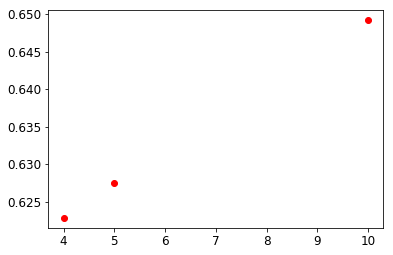

In [112]:
plt.plot([4,5,10],[0.622815122509 ,0.627534994104,0.649168409103],'ro')

In [15]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='roc_auc')
random_search.fit(credit_prepared, credit_labels)

C:\Users\chippy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\chippy\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E51434B240>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E514365F60>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E51438B0F0>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [16]:
best_model=random_search.best_estimator_

In [17]:
credit_test = test_set.drop("default payment next month", axis = 1)

credit_test_labels = test_set["default payment next month"].copy()

credit_test_prepared = preprocess_pipeline.fit_transform(credit_test)

In [18]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

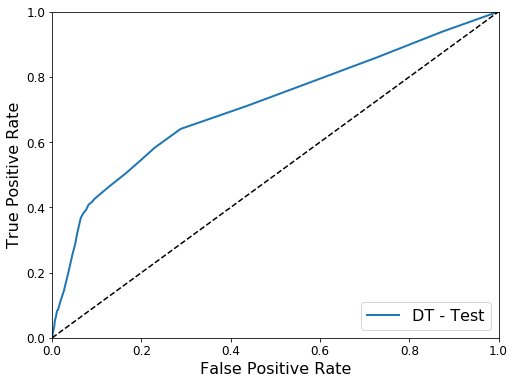

In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_probas_DT_test = cross_val_predict(best_model, credit_test_prepared, credit_test_labels, cv=5, method="predict_proba")
y_scores_DT_test = y_probas_DT_test[:, 1] 
fpr_DT_test, tpr_DT_test, thresholds_DT_test = roc_curve(credit_test_labels,y_scores_DT_test)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_DT_test, tpr_DT_test, "DT - Test")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [20]:
roc_auc_score(credit_test_labels, y_scores_DT_test)

0.71037939344103818

### Ensemble Learning

Make sure to read and understand the documentation for each classifier.

Remember to make your code modular; it will save you rewriting the same things multiple times and will help avoid copy paste errors.


  
- Tune the following classifiers:
  - Random forest classfier
  - Adaboost Tree classifier
  - Extra trees classifier
  - Gradient Boosted Tree classifier
  - Logistic Regression
  
- Analyze, compare, and interpret your results
- What ensemble yields the best result? Can you identify certain types of events that are classified better/worse from the type of algorithm?
- Is the feature importance consistent for all classifiers?

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=123)
param_RF = [{'n_estimators':  [4, 5, 10, 20, 50]}]
grid_search_RF = GridSearchCV(RF, param_RF, cv=5 ,scoring='roc_auc')
grid_search_RF.fit(credit_prepared, credit_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [4, 5, 10, 20, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [22]:
grid_search_RF.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False)

In [23]:
grid_search_RF.best_score_

0.76059562918553392

In [24]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
param_Ada = {'n_estimators': (100, 200),
                  'base_estimator__max_depth': (1, 2),
                  'algorithm': ('SAMME', 'SAMME.R')}
ada_clf = GridSearchCV(boost, param_Ada,scoring='roc_auc')
ada_clf.fit(credit_prepared, credit_labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 200), 'base_estimator__max_depth': (1, 2), 'algorithm': ('SAMME', 'SAMME.R')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [25]:
ada_clf.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [26]:
ada_clf.best_score_

0.77544890191053595

In [27]:
#Extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier
ET= ExtraTreesClassifier()
parameter_ET = {'criterion': ['gini', 'entropy'],
                       'max_depth': [4, 10, 20],
                       'min_samples_split' : [2, 4, 8],
                       'max_depth' : [3, 10, 20]}
ET_clf = GridSearchCV(ET, parameter_ET,scoring='roc_auc')
ET_clf.fit(credit_prepared, credit_labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 10, 20], 'min_samples_split': [2, 4, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [28]:
ET_clf.best_estimator_

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=10, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [29]:
ET_clf.best_score_

0.76670307922535585

In [30]:
#Gradient Boosted Tree classifier
from sklearn.ensemble import GradientBoostingClassifier
param_gbc ={'n_estimators': [100], 
                'learning_rate':[0.01,0.1,1], 
                'max_depth': [2,3,4], 
                'min_samples_split': [3]}

gbt = GridSearchCV(GradientBoostingClassifier(), param_grid=param_gbc, cv=5, n_jobs=-1, scoring='roc_auc')
gbt.fit(credit_prepared, credit_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [2, 3, 4], 'min_samples_split': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [31]:
gbt.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=3, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [32]:
gbt.best_score_

0.77979278646326666

In [33]:
#Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logistic = linear_model.LogisticRegression()
param_lr = {'C': np.logspace(-4, 4, 3)}
lr = GridSearchCV(logistic, param_grid=param_lr, cv=5, n_jobs=-1, scoring='roc_auc')
lr.fit(credit_prepared, credit_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-04,   1.00000e+00,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [34]:
lr.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
lr.best_score_

0.64785604313993672

In [47]:
cfs_1=grid_search_RF.best_estimator_
cfs_2=ada_clf.best_estimator_
cfs_3=ET_clf.best_estimator_
cfs_4=gbt.best_estimator_
cfs_5=lr.best_estimator_

In [73]:

cfs_1.feature_importances_

array([  5.92137441e-02,   6.42724016e-02,   9.59563213e-02,
         4.28858985e-02,   2.52297830e-02,   2.81863868e-02,
         2.43157567e-02,   1.93776024e-02,   5.79544659e-02,
         5.26611899e-02,   5.08924985e-02,   4.85164762e-02,
         4.74436899e-02,   4.94286407e-02,   4.90328012e-02,
         4.75190964e-02,   4.38642394e-02,   4.09544061e-02,
         4.40536622e-02,   4.41039702e-02,   8.23615787e-03,
         8.37927535e-03,   3.67020127e-06,   8.25599284e-03,
         9.53522440e-03,   7.85698763e-03,   3.61467682e-04,
         9.34407070e-04,   4.46507944e-04,   2.62771841e-04,
         8.89037387e-03,   9.00340289e-03,   1.97072949e-03])

In [74]:
cfs_2.feature_importances_

array([  5.05183223e-02,   4.18954292e-03,   2.51217129e-01,
         5.86201715e-02,   3.62100199e-02,   2.52178945e-02,
         2.17252591e-02,   3.70868996e-02,   6.46302115e-02,
         5.34362576e-02,   2.56255332e-02,   2.70438229e-02,
         2.22262998e-02,   3.56099160e-03,   7.56997316e-02,
         2.28835317e-02,   2.75201628e-02,   7.83339856e-02,
         2.25622606e-02,   9.02864360e-03,   1.27064168e-02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.73565408e-04,   2.52677845e-02,
         2.74719493e-02,   0.00000000e+00,   9.88931356e-03,
         0.00000000e+00,   7.15429911e-03,   0.00000000e+00])

In [75]:
cfs_3.feature_importances_

array([  6.45271373e-02,   8.32397972e-03,   2.25003695e-01,
         1.06482916e-01,   1.43882028e-01,   1.63442021e-01,
         6.86993240e-02,   6.42638600e-02,   1.45074603e-02,
         7.38936343e-03,   8.74995158e-03,   1.11416408e-02,
         1.00118641e-02,   6.65765966e-03,   6.81582032e-03,
         1.30201135e-02,   5.29616307e-03,   4.16352657e-03,
         5.18007056e-03,   9.72573021e-03,   7.15248471e-03,
         7.65961093e-03,   8.77969294e-05,   7.27458877e-03,
         5.03965700e-03,   5.63692190e-03,   1.13791191e-03,
         2.82882596e-03,   5.86461012e-04,   4.58129074e-04,
         5.22477278e-03,   6.16724313e-03,   3.46126987e-03])

In [76]:
cfs_4.feature_importances_

array([ 0.07139806,  0.04196526,  0.14375533,  0.02838334,  0.0345988 ,
        0.0169512 ,  0.01508975,  0.02060832,  0.09336286,  0.05794164,
        0.0643641 ,  0.04580334,  0.03942314,  0.0621206 ,  0.04064127,
        0.03780535,  0.03174048,  0.03134996,  0.04923904,  0.02736315,
        0.00610464,  0.00226835,  0.        ,  0.00181899,  0.0050026 ,
        0.000295  ,  0.00222609,  0.00895278,  0.00050263,  0.00356202,
        0.00297312,  0.00991434,  0.00247445])

- Stack your models. 
  - Combine the models from the previous section using the stacking approach: 
    - Choose the model use to combine. Examples are:
      - Linear Regression
      - Logistic Regression

In [48]:
#stacking
#https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score
sclf = StackingClassifier(classifiers=[cfs_1, cfs_2, cfs_3,cfs_4], 
                          meta_classifier=cfs_5)

In [71]:
param_s = {'adaboostclassifier__n_estimators': [10, 50],
           'randomforestclassifier__n_estimators': [10, 50],
           'extratreesclassifier__n_estimators': [10, 50],
           'gradientboostingclassifier__n_estimators': [10, 50],
          'meta-logisticregression__C': [0.1, 10.0]}
grids = GridSearchCV(estimator=sclf, param_grid=param_s ,cv=5,refit=True)
grids.fit(credit_prepared, credit_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=StackingClassifier(average_probas=False,
          classifiers=[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_sample...erbose=0, warm_start=False),
          use_features_in_secondary=False, use_probas=False, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'adaboostclassifier__n_estimators': [10, 50], 'randomforestclassifier__n_estimators': [10, 50], 'extratreesclassifier__n_estimators': [10, 50], 'gradientboostingclassifier__n_estimators': [10, 50], 'meta-logisticregression__C': [0.1, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [72]:
cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grids.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grids.cv_results_[cv_keys[0]][r],
             grids.cv_results_[cv_keys[1]][r] / 2.0,
             grids.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grids.best_params_)
print('Accuracy: %.2f' % grids.best_score_)

0.803 +/- 0.00 {'adaboostclassifier__n_estimators': 10, 'extratreesclassifier__n_estimators': 10, 'gradientboostingclassifier__n_estimators': 10, 'meta-logisticregression__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.815 +/- 0.00 {'adaboostclassifier__n_estimators': 10, 'extratreesclassifier__n_estimators': 10, 'gradientboostingclassifier__n_estimators': 10, 'meta-logisticregression__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.803 +/- 0.00 {'adaboostclassifier__n_estimators': 10, 'extratreesclassifier__n_estimators': 10, 'gradientboostingclassifier__n_estimators': 10, 'meta-logisticregression__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.815 +/- 0.00 {'adaboostclassifier__n_estimators': 10, 'extratreesclassifier__n_estimators': 10, 'gradientboostingclassifier__n_estimators': 10, 'meta-logisticregression__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.803 +/- 0.00 {'adaboostclassifier__n_estimators': 10, 'extratreesclassifier__n_estimators': 10, 

#### Conclusions?

Explain your results and choices

Best parameters: {'adaboostclassifier__n_estimators': 10, 'extratreesclassifier__n_estimators': 10, 'gradientboostingclassifier__n_estimators': 10, 'meta-logisticregression__C': 0.1, 'randomforestclassifier__n_estimators': 50}
Accuracy: 0.81

Q. (Optional) If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?

`answer here`-maybe a good idea to decrease max_depth,
since this will constrain the model, regularizing it

Q. (Optional) If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?
Answer: dont think scalling helps with anything with decision tree

`answer here`

Q. (Optional) What is the difference between hard and soft voting classifiers?

`answer here`-A hard voting classifier just counts the votes of each classifier in the ensemble and picks the
class that gets the most votes. A soft voting classifier computes the average estimated class
probability for each class and picks the class with the highest probability.

Q. (Optional) If your AdaBoost ensemble underfits the training data, what hyperparameters should you tweak and how?


`answer here`-increasing the number of estimators and learning rate

Q. (Optional) If your Gradient Boosting ensemble overfits the training set, should you increase or decrease the learning rate?

`answer here` decrease the learning rate

### Conclusions


### Submit your notebook

Submit your solution here
https://goo.gl/forms/VKD7Zwu54oHjutDc2
Make sure you rename your notebook to    
W3_UTORid.ipynb    
Example W3_adfasd01.ipynb
